<a href="https://colab.research.google.com/github/ronaldoaugustodemorais/Ocean_DeepLearning_13-08-2021/blob/main/Ocean_DeepLearning_13_08_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Tensorflow
# Keras
# Redes Neurais

# Glossário de Python

# Exibir informações
print("Hello, world!")

# Declarar uma variável
numero = 20
print(numero, type(numero))

# Trabalhar com listas e exibir tipo das informações
lista = [10, 20, 30]
print(lista, type(lista))

# Pegar elementos da lista
elemento_da_lista = lista[0]
print(elemento_da_lista, type(elemento_da_lista))

# Mudar elementos da lista
lista[1] = 99
print(lista, type(lista), type(lista[1]))

# Quantidade de elementos da lista
quantidade_elementos = len(lista)
print("Quantidade de elementos", quantidade_elementos, type(quantidade_elementos))

# Tupla
tupla = (51, 62, 79)
print(tupla, type(tupla))

tupla2 = 99, 11, 13
print(tupla2, type(tupla2))

tupla3 = 10, 5
print(tupla3, type(tupla3))

# Acessando elementos da tupla
elemento_da_tupla = tupla[0]
print(elemento_da_tupla, type(elemento_da_tupla))

# Tupla vs Lista?
# Tuplas não podem ser modificadas
# TypeError: 'tuple' object does not support item assignment
# tupla[0] = 30

# Atalho para comentar: Ctrl + /

tupla4 = 9, 6, 3, 2
print(tupla4, type(tupla4))

"""
tupla4_em_lista = list(tupla4)
tupla4_em_lista[0] = 99
tupla4_lista_em_tupla_novamente = tuple(tupla4_em_lista)
print(tupla4_lista_em_tupla_novamente, type(tupla4_lista_em_tupla_novamente))
"""

# Comentários de uma linha
"""
Comentários
de
várias
linhas
"""

Hello, world!
20 <class 'int'>
[10, 20, 30] <class 'list'>
10 <class 'int'>
[10, 99, 30] <class 'list'> <class 'int'>
Quantidade de elementos 3 <class 'int'>
(51, 62, 79) <class 'tuple'>
(99, 11, 13) <class 'tuple'>
(10, 5) <class 'tuple'>
51 <class 'int'>
(9, 6, 3, 2) <class 'tuple'>


'\nComentários\nde\nvárias\nlinhas\n'

In [6]:
nome = "Ronaldo Augusto"

contador = 0

In [13]:
# Nova célula

print(nome)

contador = contador + 1
print(f"Esse nome foi exibido {contador} vez(es)!")


Ronaldo Augusto
Esse nome foi exibido 7 vez(es)!


In [15]:
# Importar TensorFlow, Keras e todas as ferramentas/bibliotecas que precisamos!

from tensorflow import keras # Importa a biblioteca Keras
from keras.datasets import mnist # Base de Dados MNIST - 60k imagens treino, 10k imagens teste
from tensorflow.python.keras import Sequential # Arquitetura da nossa rede neural
from tensorflow.python.keras.layers import Dense, Dropout # Neurônio (base da rede) e Regularizador (evita overfitting)
from tensorflow.compat.v1.keras.optimizers import RMSprop # Otimizador (back propagation)


In [17]:
(x_treino, y_treino), (x_teste, y_teste) = mnist.load_data()



11501568/11490434 [==============================] - 0s 0us/step


In [19]:
print("Quantidade de imagens para treino:", len(x_treino))

print("Quantidade de imagens para teste:", len(x_teste))

print("Tipo de x_treino:", type(x_treino))

primeira_imagem = x_treino[0]

representacao_primeira_imagem = y_treino[0]

print("O que a imagem 0 de treino representa?",representacao_primeira_imagem)

print("Formato da primeira imagem:", primeira_imagem.shape, type(primeira_imagem))

print(primeira_imagem)

Quantidade de imagens para treino: 60000
Quantidade de imagens para teste: 10000
Tipo de x_treino: <class 'numpy.ndarray'>
O que a imagem 0 de treino representa? 5
Formato da primeira imagem: (28, 28) <class 'numpy.ndarray'>
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253

A imagem representa: 1


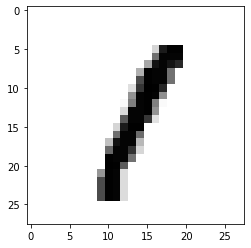

In [22]:
import matplotlib.pyplot as plt
indice = 77

print("A imagem representa:",y_treino[indice])

plt.imshow(x_treino[indice], cmap=plt.cm.binary)


In [23]:
# Fluxo para construção da rede neural

# - Organizar a camada de entrada (input)
# - Organizar a camada de saída (output)
# - Estruturar a nossa rede neural
# - Treinar o modelo
# - Fazer as previsões

In [24]:
# Achatando a matriz de pixels e transformando em uma única lista

quantidade_treino = len(x_treino) # 60000
quantidade_teste = len(x_teste) # 10000

resolucao_imagem = x_treino[0].shape # (28, 28)
resolucao_total = resolucao_imagem[0] * resolucao_imagem[1] # 28 * 28 = 784

x_treino = x_treino.reshape(quantidade_treino, resolucao_total)

x_teste = x_teste.reshape(quantidade_teste, resolucao_total)

In [25]:
print("Quantidade de itens em x_treino[0]:", len(x_treino[0]))

# Como será que ficou x_treino[0]?
print(x_treino[0])

Quantidade de itens em x_treino[0]: 784
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 25

In [26]:
# Normalização de dados

# 255 vire 1
# 127 vire 0.5
# 0 vire 0
# E assim por diante

# Posso pegar o meu valor que eu quero transformar e dividir pelo valor máximo do meu intervalo
# Exemplo, se eu dividir 255 por 255, tenho 1
# Exemplo, se eu dividir 127 por 255, tenho ~0.5
# Exemplo, se eu dividir 0 por 255, tenho 0

"""
# Explicando o porque da conversão de tipos

primeira_imagem = x_treino[0]
primeiro_pixel = primeira_imagem[0] # uint8

# Quando eu divido uint8 por algum número, recebemos um float64
# Porém, o tensorflow precisa de float32 para trabalhar
# Portanto, precisamos converter o tipo antes de dividí-lo

print(primeiro_pixel, type(primeiro_pixel / 255)) # float64

# Fim da explicação
"""

'\n# Explicando o porque da conversão de tipos\n\nprimeira_imagem = x_treino[0]\nprimeiro_pixel = primeira_imagem[0] # uint8\n\n# Quando eu divido uint8 por algum número, recebemos um float64\n# Porém, o tensorflow precisa de float32 para trabalhar\n# Portanto, precisamos converter o tipo antes de dividí-lo\n\nprint(primeiro_pixel, type(primeiro_pixel / 255)) # float64\n\n# Fim da explicação\n'

In [27]:
# Normalização de dados

# Conversão para tipos

x_treino = x_treino.astype('float32')
x_teste = x_teste.astype('float32')

x_treino /= 255 # Divide todos os 60000 valores de x_treino por 255 e armazena esse resultado em x_treino
x_teste /= 255 # Divide todos os 10000 valores de x_teste por 255 e armazena esse resultado em x_teste

In [28]:
# Como está o pixel 350 da primeira imagem de x_treino?
print(x_treino[0][350], type(x_treino[0][350]))

# Como está x_treino[0] agora?
print(x_treino[0])

0.27450982 <class 'numpy.float32'>
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.       